<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/P1_2_Feature_Extraction_with_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·大作业·利用自编码器AutoEncoder提取特征

#### 纪泽西 17375338

#### Last Modified:11st,May,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/P1_2_Feature Extraction_with_AutoEncoder&HOG.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *

import os
import scipy.io as sio

%cd /content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset


In [0]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
x_train = x_train/255.0
x_test = x_test/255.0

In [3]:
print(x_train.shape,x_test.shape)
print(np.unique(y_test))
print(np.bincount(y_test.astype(int)))

(14536, 51, 51) (6229, 51, 51)
[0. 1. 2.]
[ 683 2439 3107]


## Part2:数据预处理

#### 可视化展现数据集特征

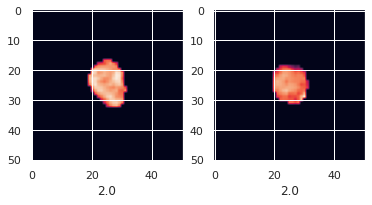

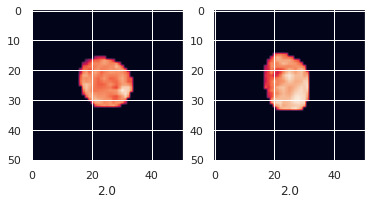

In [0]:
for i in range(10,12):
  plt.subplot(1,2,1)
  plt.imshow(x_test[i,:,:])
  plt.xlabel(y_test[i])
  plt.subplot(1,2,2)
  plt.imshow(x_train[i,:,:])
  plt.xlabel(y_train[i])
  plt.show()

## Part3:模型建立


本Notebook中使用自编码器提取特征，辅助数据分类

### 1.对BP神经网络使用AutoEncoder

#### 基本模型建立

In [88]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(51, 51)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
model_0.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 2601)              0         
_________________________________________________________________
dense_173 (Dense)            (None, 64)                166528    
_________________________________________________________________
dense_174 (Dense)            (None, 3)                 195       
Total params: 166,723
Trainable params: 166,723
Non-trainable params: 0
_________________________________________________________________


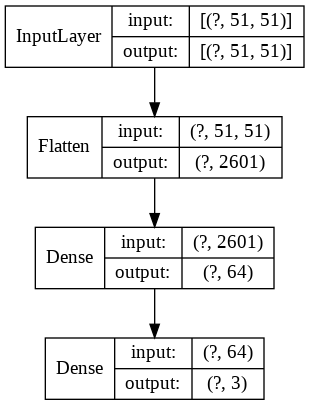

In [89]:
plot_model(model_0,show_shapes=True, show_layer_names=False)

In [0]:
model_0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model_0.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8762 - accuracy: 0.6645 - val_loss: 0.8747 - val_accuracy: 0.6691
Epoch 2/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.6649 - val_loss: 0.8743 - val_accuracy: 0.6717
Epoch 3/10
114/114 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.6644 - val_loss: 0.8760 - val_accuracy: 0.6643
Epoch 4/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.6659 - val_loss: 0.8739 - val_accuracy: 0.6712
Epoch 5/10
114/114 [==============================] - 0s 2ms/step - loss: 0.8759 - accuracy: 0.6659 - val_loss: 0.8750 - val_accuracy: 0.6685
Epoch 6/10
114/114 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.6651 - val_loss: 0.8760 - val_accuracy: 0.6656
Epoch 7/10
114/114 [==============================] - 0s 3ms/step - loss: 0.8759 - accuracy: 0.6648 - val_loss: 0.8754 - val_accuracy: 0.6696
Epoch 

#### 使用Autoencoder处理数据

In [0]:

encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024,activation='relu',input_shape=[2601]) ,                                   
  tf.keras.layers.Dense(512,activation='relu') ,
  tf.keras.layers.Dense(256) 
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,activation='relu',input_shape=[256]) ,                                   
  tf.keras.layers.Dense(512,activation='relu') ,
  tf.keras.layers.Dense(1024,activation='relu') ,
  tf.keras.layers.Dense(2601,activation='sigmoid')
])

AE = tf.keras.models.Sequential([
  encoder,                               
  decoder
])

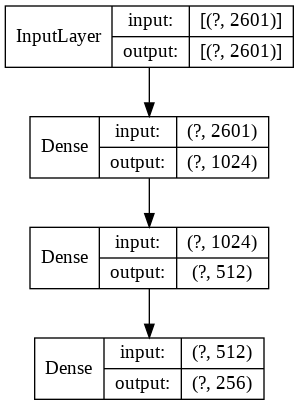

In [93]:
plot_model(encoder,show_shapes=True, show_layer_names=False)

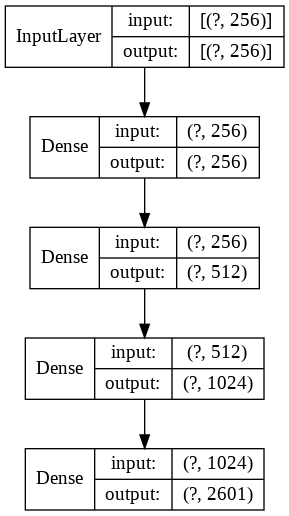

In [94]:
plot_model(decoder,show_shapes=True, show_layer_names=False)

In [0]:
x_train = x_train.reshape(x_train.shape[0],2601)
x_test = x_test.reshape(x_test.shape[0],2601)

In [96]:
AE.compile(optimizer='adam',loss='binary_crossentropy')
AE.fit(x_train,x_train,epochs=2,batch_size=256)

Epoch 1/2
57/57 [==============================] - 12s 203ms/step - loss: 0.1169
Epoch 2/2
57/57 [==============================] - 12s 217ms/step - loss: 0.0580


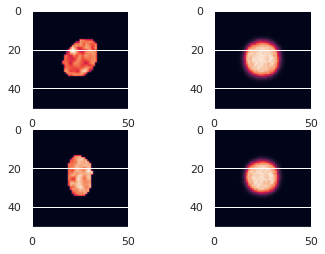

In [97]:
x_train_en = encoder.predict(x_train)
x_test_en = encoder.predict(x_test)
x_train_de = decoder.predict(x_train_en)
x_test_de = decoder.predict(x_test_en)

plt.subplot(2,2,1)
plt.imshow(x_test[123,:].reshape([51,51]))
plt.subplot(2,2,2)
plt.imshow(x_test_de[123,:].reshape([51,51]))
plt.subplot(2,2,3)
plt.imshow(x_train[456,:].reshape([51,51]))
plt.subplot(2,2,4)
plt.imshow(x_train_de[456,:].reshape([51,51]))
plt.show()


In [0]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [0]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history_en = model1.fit(x_train_en,y_train,batch_size=128,epochs=10,validation_data=(x_test_en,y_test))

Epoch 1/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8901 - accuracy: 0.6522 - val_loss: 0.8764 - val_accuracy: 0.6672
Epoch 2/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8690 - accuracy: 0.6688 - val_loss: 0.8646 - val_accuracy: 0.6736
Epoch 3/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8640 - accuracy: 0.6728 - val_loss: 0.8626 - val_accuracy: 0.6723
Epoch 4/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8622 - accuracy: 0.6756 - val_loss: 0.8603 - val_accuracy: 0.6799
Epoch 5/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8610 - accuracy: 0.6769 - val_loss: 0.8582 - val_accuracy: 0.6812
Epoch 6/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8581 - accuracy: 0.6789 - val_loss: 0.8592 - val_accuracy: 0.6788
Epoch 7/10
114/114 [==============================] - 1s 6ms/step - loss: 0.8576 - accuracy: 0.6812 - val_loss: 0.8591 - val_accuracy: 0.6780
Epoch 

### 2.在聚类中应用Autoencoder

#### 基本模型建立

In [0]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import fowlkes_mallows_score
import seaborn as sns
sns.set()
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    score_f=fowlkes_mallows_score(y_test,yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")
    print('F-Score:',score_f)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.cluster import AgglomerativeClustering
from time import *

In [0]:
st = time()
ac = AgglomerativeClustering(n_clusters=12,affinity='euclidean')
labels = ac.fit_predict(x_test_c)
et = time()
print('Time Usage:',et-st,'s')

Time Usage: 51.75371479988098 s


**注：此处通过扩大聚类数量后合并提高效果**

Sum Axis-1 as Classification accuracy: 0.23920372451436828
F-Score: 0.2712651464329277


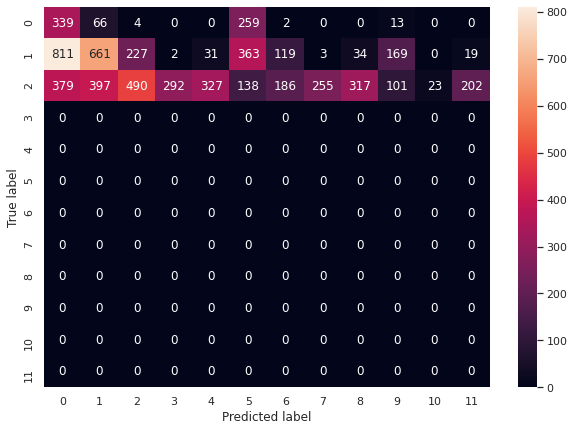

In [0]:
draw_confusionmatrix(y_test_c,labels)

Sum Axis-1 as Classification accuracy: 0.6301171937710708
F-Score: 0.5200500027145227


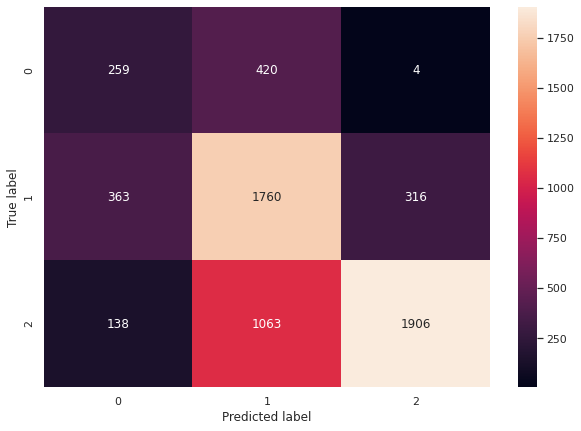

In [0]:
temp=[1,1,2,2,2,0,1,2,2,1,2,2]
y_hat1=np.zeros(6229)
for i in range(0,6229):
  y_hat1[i] = temp[labels[i]]
draw_confusionmatrix(y_test_c,y_hat1)  

#### 使用AutoEncoder提取特征维

In [0]:
encoding_dim = 10

In [0]:
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(8,activation='relu') ,
  tf.keras.layers.Dense(encoding_dim) 
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(128,activation='relu') ,
  tf.keras.layers.Dense(2601,activation='sigmoid') 
])

AE = tf.keras.models.Sequential([
  encoder,                               
  decoder
])

In [0]:
AE.compile(optimizer='adam',loss='binary_crossentropy')
AE.fit(x_test_c,x_test_c,epochs=10,batch_size=256)

Epoch 1/10
25/25 [==============================] - 1s 36ms/step - loss: 0.4883
Epoch 2/10
25/25 [==============================] - 1s 35ms/step - loss: 0.1003
Epoch 3/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0751
Epoch 4/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0697
Epoch 5/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0670
Epoch 6/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0652
Epoch 7/10
25/25 [==============================] - 1s 37ms/step - loss: 0.0625
Epoch 8/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0594
Epoch 9/10
25/25 [==============================] - 1s 38ms/step - loss: 0.0585
Epoch 10/10
25/25 [==============================] - 1s 36ms/step - loss: 0.0581


In [0]:
st = time()
ac1 = AgglomerativeClustering(n_clusters=12,affinity='euclidean')
labels1 = ac1.fit_predict(x_encoded)
et = time()
print('Time Usage:',et-st,'s')

Time Usage: 1.0903100967407227 s


**注：此处通过扩大聚类数量后合并提高效果**

Sum Axis-1 as Classification accuracy: 0.1086851822122331
F-Score: 0.25337491957118946


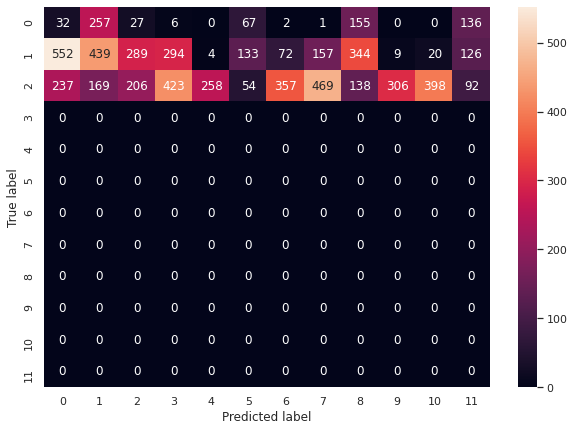

In [0]:
draw_confusionmatrix(y_test_c,labels1)

Sum Axis-1 as Classification accuracy: 0.6482581473751806
F-Score: 0.5425964878550984


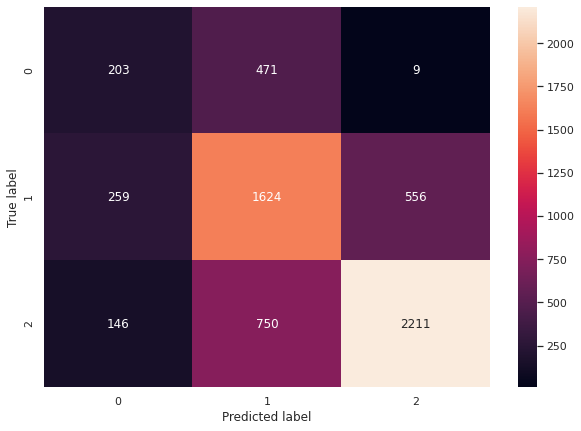

In [0]:
temp=[1,1,1,2,2,0,2,2,1,2,2,0]
y_hat2=np.zeros(6229)
for i in range(0,6229):
  y_hat2[i] = temp[labels1[i]]
draw_confusionmatrix(y_test_c,y_hat2)  

## 总结

对于BP神经网络，在相同的基础模型中，训练相同的Epoches，Autoencoder使训练速度极大程度提升，并且准确率由67%提升至69%.<由于基础模型较简单，整体效果不尽如人意，在CNN分类器等较复杂的分类器中，可达到≥75%的分类效果>
对于聚类分析，使用相同的层次聚类法，准确率由63%提升至65%，且训练速度极大程度提升。